## Case-Control Data
[Lecture notes](https://github.com/bcaffo/MathematicsBiostatisticsBootCamp2/blob/master/lecture10.pdf)

This notebook is made using the cancer/smoking data in the lecture.

In [1]:
from scipy.stats import chi2_contingency, norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def plot_hist(ax, arr, obs_val, bins=16):
    vals, edges = np.histogram(arr, bins=bins)
    ax.hist(arr, bins=edges, edgecolor='w')

    ax.set_xticks(edges)
    ax.set_xticklabels(labels=list(map(lambda x: '{:.2f}'.format(x), edges)), rotation=45)
    ax.axvline(x=obs_val, linestyle='--', color='black', label='Observed value')
    
def odds_ratio(table):
    return (table[0, 0] * table[1, 1]) / (table[0, 1] * table[1, 0])

In [3]:
# Data table
table = np.array([
    [688, 650],
    [21, 59]
])

In [4]:
# Observed odds ratio
obs_or = odds_ratio(table)
obs_or

2.9737728937728938

In [5]:
# Observed Chi2 statistic
obs_stat, obs_p_val, df, exp_vals =  chi2_contingency(table, correction=False)
obs_stat

19.129222720478325

In [6]:
# Computing the Chi2 Stat manually
((table - exp_vals)**2 / exp_vals).sum()

19.129222720478325

### Computing the P-value using a permutation test
We have 1418 patients in total, 709 cases and 709 controls. From the 1418 patients, 1338 are smokers. Under the null hypothesis, being a case is independent of being a smoker. Therefore we here permutate the smokers between cases and controls to compute a p_value for the odds ratio.

In [7]:
n = 10000

# Empty array of 1418 patients, first 709 are cases and the others are controls
arr = np.zeros(1418)

# Adding smoker labels (1)
arr[:1338] = 1

iter_table = np.zeros((2, 2))
or_arr = np.zeros(n)
stat_arr = np.zeros(n)

for i in range(n):
    iter_arr = np.random.permutation(arr)
    
    iter_table[0, 0] = iter_arr[:709].sum()
    iter_table[1, 0] = 709 - iter_arr[:709].sum()
    iter_table[0, 1] = iter_arr[709:].sum()
    iter_table[1, 1] = 709 - iter_arr[709:].sum()
    
    or_arr[i] = odds_ratio(iter_table)
    iter_stat, pval, df, exp_vals =  chi2_contingency(iter_table)
    stat_arr[i] = iter_stat

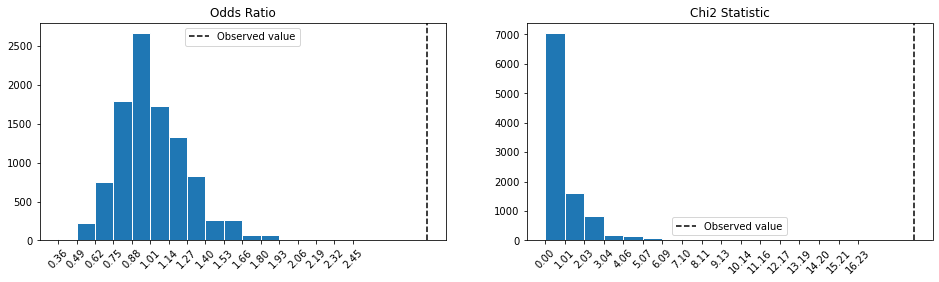

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

ax0 = axs[0]
plot_hist(ax0, or_arr, obs_or, bins=16)
ax0.set_title('Odds Ratio')
ax0.legend()

ax1 = axs[1]
plot_hist(ax1, stat_arr, obs_stat, bins=16)
ax1.set_title('Chi2 Statistic')
ax1.legend()

plt.show()

In [11]:
p_val = (or_arr > obs_or).mean() * 2
p_val

0.0

In [12]:
# Using the Chi Squared test
chi2_contingency(table)

(18.135668908819135,
 2.0571173725573627e-05,
 1,
 array([[669., 669.],
        [ 40.,  40.]]))

### Creating a confidence interval for the odds ratio


In [13]:
log_or = np.log(obs_or)
se = np.sqrt((1. / table).sum())

CI = np.exp(log_or + np.array([-1, 1])*1.96*se)

CI

array([1.7867203 , 4.94947374])

In [14]:
# Computing p-value
(1 - norm.cdf(log_or, scale=se))*2

2.754162460649745e-05